# Példa 1.24

Az ábrán látható összetett keresztmetszet terhelése $20\, \rm{ kN}$ nagyságú nyíró igénybevétel. Határozza meg a keresztmetszet mentén a nyírásból adódó csúsztatófeszültségek eloszlását megadó $\tau(y)$ függvényt és annak maximumát!

<img src="Fig_1.24.png" style="width: 200px;">

# Megoldás

A megoldás során szükségünk van a `sympy` modulra, valamint az `y` szimbólumra.

In [1]:
import sympy as sp
sp.init_printing() # ezzel a beállítással szépen tudjuk kiíratni a 'gyári' Python számokat is
y=sp.symbols("y")

Megadjuk a később felhasznált adatokat. Jelöljük $a$-val a keresztmetszet $z$ irányú méretét a végeken (az ábrán: $20 \,\rm{mm}$), illetve $b$-vel az $y$ irányú szélső méretet (az ábrán: $100 \,\rm{mm}$).

In [2]:
V=20  #kN
a=20  #mm
b=100 #mm

A keresztmetszet: 1 db $a\times3b$ téglalap és 2 db $a\times b$ téglalap. Ez alapján az $I_z$ másodrendű nyomaték:

In [3]:
Iz=a*(3*b)**3/12+2*a*b**3/12
Iz #mm**4

Mivel a keresztmetszet szimmetrikus a $z$ tengelyre, elég csak a $y\geq0$ résszel számolnunk. A "vékonyabb" részt jelüljük I.-vel ($50 \,\rm{mm}< y\le150\,\rm{mm}$), a "vastagabbat" II.-kal ($0\,\rm{mm}\leq y\le 50\,\rm{mm}$).

## I. rész

A keresztmetszet szélessége:
$$a_I(y)=20 \,\rm{mm}.$$
Ez alapján az $S_I(y)$ statikai nyomaték a következő módon számolható:

In [4]:
S_I=20*(150-y)*(150+y)/2
S_I=S_I.simplify() #egyszerűsítjük a kapott kifejezést
S_I #mm**3

Ebből a nyírásból származó csúszatófeszültség:
$$\tau_I(y)=\frac{V S_I(y)}{I_z a_I(y)}.$$

In [5]:
τ_I=1000*V*S_I/Iz/a # a terhelés kN-ban van megadva, ezt átváltjuk N-ba
τ_I.evalf(5) #MPa

## II. rész

A keresztmetszet szélessége:
$$a_{II}(y)=60 \,\rm{mm}.$$
Ez alapján az $S_{II}(y)$ statikai nyomaték a következő módon számolható:

In [6]:
S_II=20*100*100+60*(50-y)*(50+y)/2
S_II=S_II.simplify()
S_II

In [7]:
τ_II=1000*V*S_II/Iz/(3*a) # a terhelés kN-ban van megadva, ezt átváltjuk N-ba
τ_II.evalf(5) #MPa

## Ábrázolás

A teljes feszültségeloszlást a `Piecewise` függvény segítségével adhatjuk meg. Ha $0\,\rm{mm}\leq y \le 50\,\rm{mm}$, akkor $\tau(y)=\tau_{II}(y)$. Ha $50\,\rm{mm}< y \le 150\,\rm{mm}$, akkor $\tau(y)=\tau_{I}(y)$.

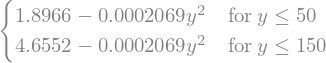

In [8]:
τ=sp.Piecewise((τ_II, y<=50),(τ_I, y<=150))
τ.evalf(5) 

Láthatjuk, hogy a `Piecewise` szintaktikája matemetikailag nem tejesen korrekt, hiszen ami kielégíti az $y\le 50$ feltételt, az az $y\le 150$ feltételt is teljesíti. Viszont a program a feltételeket sorrendben értékeli ki: ha kap egy $y$ értéket, amely az első ($y\le 50$) feltételt teljesíti, akkor nem vizsgálja meg a többi feltételt, hanem a függvény értéke az első teljesített feltételnek megfelelő lesz. (A teljesen korrekt feltételeket - pl: $50< y \le 150$ - nem tudjuk megadni a `Piecewise`-nak.)

Az ábrázoláshoz szükségünk van a `matplotlib` modulra a rajzoláshoz és `numpy` modulból a `linspace` függvényre, amivel egyszerűen tudunk egy intervallumon egyforma távolságra lévő értékeket generálni.

In [9]:
import matplotlib.pyplot as plt # Matplotlib könyvtárból a PyPlot alkönyvtár
from numpy import linspace

Előállítjuk az $y$ értékeket, ahol a $\tau(y)$ függvényt majd kiértékeljük:

In [10]:
y_ertekek=linspace(0,150,501) #501 értéket hozunk létre egynletesen 0 és 150 között

Kiértékeljük a $\tau(y)$ függvényt ezeken a helyeken:

In [11]:
#készítünk egy listát úgy, hogy minden elemét úgy állítjuk elő, hogy behelyettesítjük
#a soron következő 'y' értéket a 'tau' függvénybe, majd 5 értékesjegyre kiértékeljük a kifejezést
τ_ertekek=[τ.subs(y,y_ertek).evalf(5) for y_ertek in y_ertekek]

Ha a feladatban megadott ábrának megfelelően szeretnénk ábrázolni a feszültségeloszlást, akkor a vízszintes tengelyre a feszültség értékei, a függőlegesre pedig $y$ értékei kerülnek.

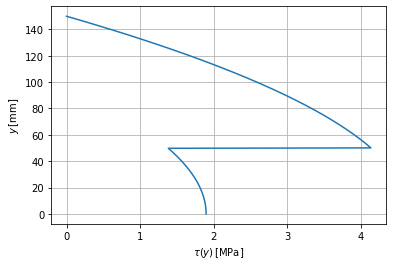

In [12]:
plt.plot(τ_ertekek,y_ertekek)
plt.grid() #rács létrehozása
plt.xlabel(r"$\tau(y)\,\rm{[MPa]}$") #vízszintes tengely felirata, a LaTeX kód miatt 'r' karakter kerül elé!
plt.ylabel(r"$y\,\rm{[mm]}$")
plt.show() #kirajozás

Az eddigiekben csak az $y\ge0$ tartományt vizsgáltuk, hiszen a keresztmetszet szimmetrikus. Ha a teljes $-150\,\rm{mm}\le y\le 150\,\rm{mm}$ tartományt szeretnénk ábrázolni, azt az eddig kiszámol értékek alapján számos módon megtehetjük.

Ezek közül az egyik, hogy a szimmetria következő tulajdonságát használjuk ki:
$$\tau(y)=\tau(-y),$$

azaz használhatjuk a korábbi `tau_ertekek` adatsort, csak a hozzájuk tartozó `y_ertekek`-nek kell az előjelét megfordítani. Mivel az `y_ertekek`-t a `linspace` segítségével definiáltuk, ezért ezt megtehetjük `-y_ertekek` szintaktikával. Ez "sima" Python listával nem működik!

Magyarázat: a `numpy` modulból a `linspace` valójában nem listát hoz létre, hanem egy `numpy` tömböt. Ezek első ránézésre hasonlítanak a listákra, viszont egy tömbben csak egyféle típust tárolhatunk, jelen esetben `ḟloat` számokat. Ezért a `numpy` megengedi, hogy a tömb elemein ezzel az egyszerű szintaktikával végezzünk műveleteket. (Hasonlóképpen a `2*tomb` a tömb minden elemének a kétszersét adná vissza.) A "sima" lista többféle típust is tárolhat egyszerre, ezért nem engedi meg ezt a szintaktikát.

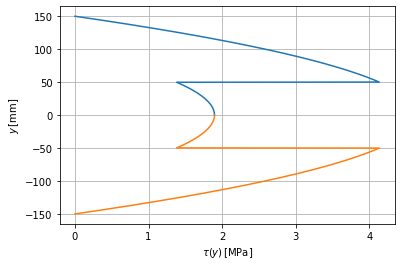

In [13]:
plt.plot(τ_ertekek,y_ertekek)
plt.plot(τ_ertekek,-y_ertekek)
plt.grid() #rács létrehozása
plt.xlabel(r"$\tau(y)\,\rm{[MPa]}$") #vízszintes tengely felirata, a LaTeX kód miatt 'r' karakter kerül elé!
plt.ylabel(r"$y\,\rm{[mm]}$")
plt.show() #kirajozás

Ha azt szeretnénk, hogy a két vonal azonos színű legyen, akkor megadhatjuk a színeket manuálisan.

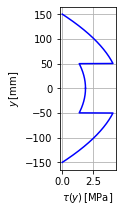

In [14]:
plt.figure(1,figsize=(1,3)) #ábra méretének megadása, hogy a gyakorlaton megismert képarányt kapjuk
plt.plot(τ_ertekek,y_ertekek,'b') #'b': a kék (=blue) szín rövid kódja
plt.plot(τ_ertekek,-y_ertekek,'b')
plt.grid() #rács létrehozása
plt.xlabel(r"$\tau(y)\,\rm{[MPa]}$") #vízszintes tengely felirata, a LaTeX kód miatt 'r' karakter kerül elé!
plt.ylabel(r"$y\,\rm{[mm]}$")
plt.show() #kirajozás